# HOUSE FARE PREDICTION

1. IMPORTING LIBRARIES AND DATSET

In [2146]:
import pandas as pd
df= pd.read_csv(r"C:/Users/User/Jeslin_data/BHOUSE.csv",encoding= 'unicode_escape')


In [2147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [2148]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2149]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [2150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [2151]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [2152]:
df.shape

(13320, 9)

In [2153]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


data visualization

<AxesSubplot:>

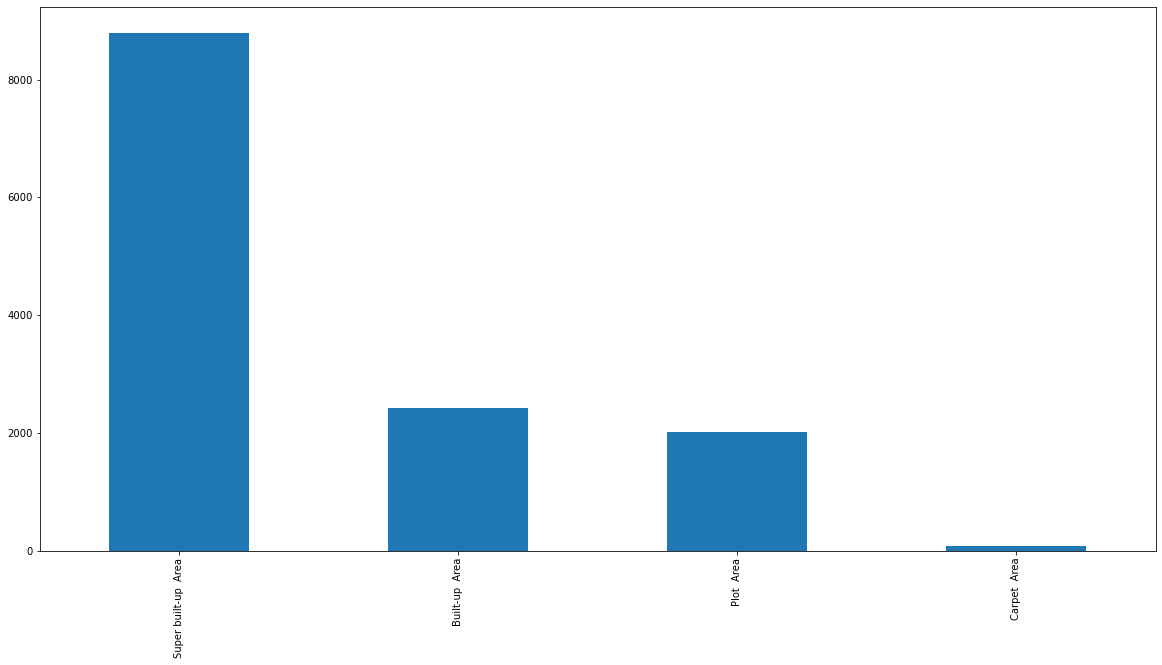

In [2154]:
df.area_type.value_counts().plot(kind='bar')

<AxesSubplot:>

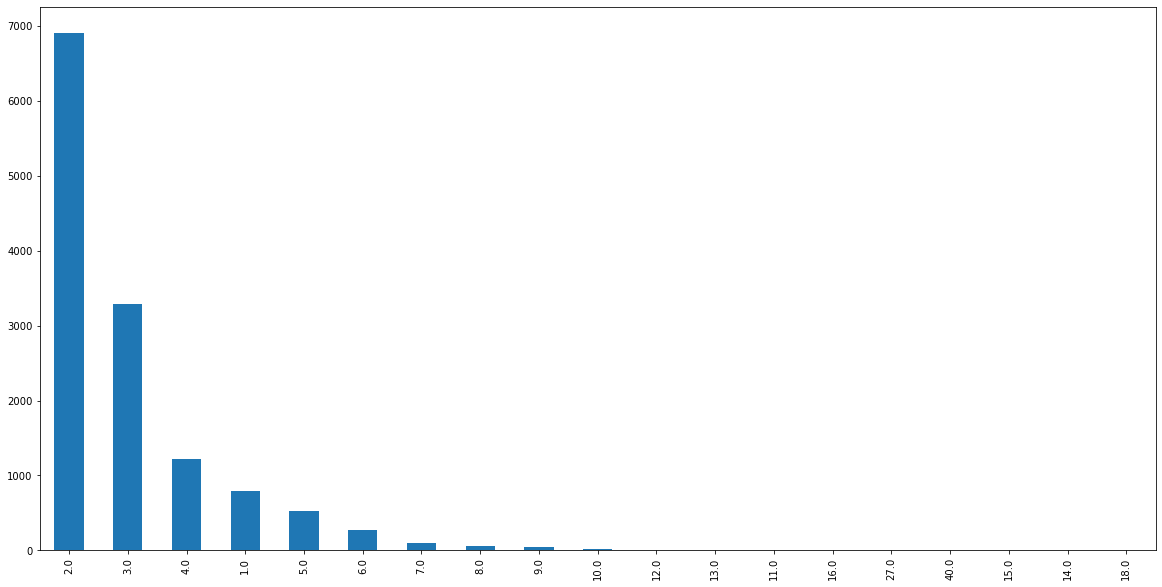

In [2155]:
df.bath.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='balcony'>

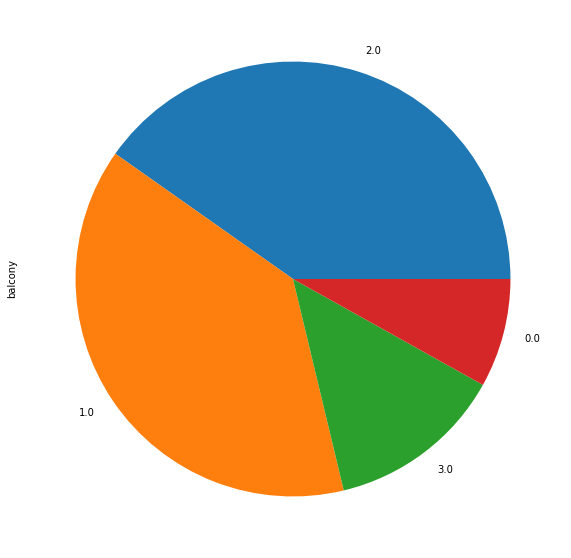

In [2156]:
df.balcony.value_counts().plot(kind='pie')

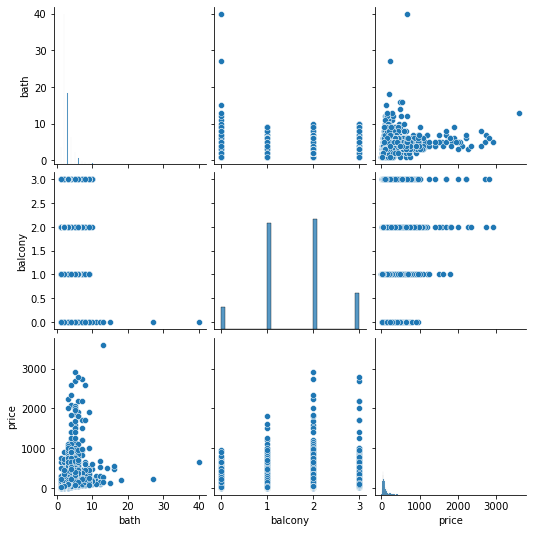

In [2157]:
sns.pairplot(df)

<AxesSubplot:>

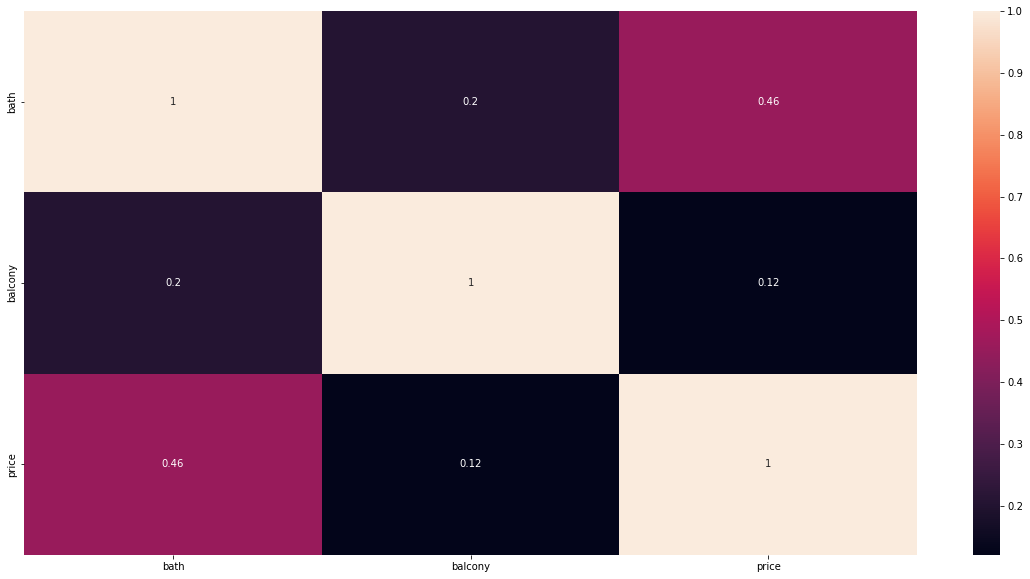

In [2158]:
sns.heatmap(df.corr(), annot = True)

2.TAKING CARE OF MISSING VALUES

In [2159]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [2160]:
df= df.drop(columns =["balcony","availability","society","area_type"])

In [2161]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [2162]:
df.shape

(13320, 5)

In [2163]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [2164]:
df['size']=df['size'].fillna('2 BHK')

In [2165]:
df.isnull().sum()

location       1
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [2166]:
#bathroom colum is a numerical column so using median imputaion
df['bath']=df['bath'].fillna(df['bath'].median)

In [2167]:
df.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [2168]:
#dropping one row for location value as null
df.dropna(inplace=True)

In [2169]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

3.TAKING CARE OF DUPLICATE VALUES

In [2170]:
df.duplicated().sum()

882

In [2171]:
df=df.drop_duplicates()

In [2172]:
df.duplicated().sum()

0

In [2173]:
df.describe()

,price
count,12437.000000
mean,115.410524
std,153.075052
min,8.000000
25%,50.000000
50%,74.000000
75%,125.000000
max,3600.000000


4.DATA PREPROCESSING

In [2174]:
df.dtypes

location       object
size           object
total_sqft     object
bath           object
price         float64
dtype: object

In [2175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12437 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12437 non-null  object 
 1   size        12437 non-null  object 
 2   total_sqft  12437 non-null  object 
 3   bath        12437 non-null  object 
 4   price       12437 non-null  float64
dtypes: float64(1), object(4)
memory usage: 583.0+ KB


DATA ENGINEERING

In [2176]:
df['BHK'] = df['size'].str.split().str.get(0).astype(int)
df.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [2177]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [2178]:
df[df.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [2179]:
df= df.drop(columns =["size"])

In [2180]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


TREATING THE TOTAL SQUARE FEET COLOUMN

In [2181]:
df.loc[30]

location        Yelahanka
total_sqft    2100 - 2850
bath                  4.0
price               186.0
BHK                     4
Name: 30, dtype: object

In [2182]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [2183]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,<bound method NDFrame._add_numeric_operations....,192.000,4
81,Hennur Road,2957 - 3450,<bound method NDFrame._add_numeric_operations....,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
224,Devanahalli,1520 - 1740,<bound method NDFrame._add_numeric_operations....,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2


In [2184]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [2185]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [2186]:
df = df[df.total_sqft.notnull()]

In [2187]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [2188]:
df.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [2189]:
df.shape

(12391, 5)

In [2190]:
#introducing new column price per square feet

In [2191]:
df['price_per_sqf']= df['price']*100000 / df['total_sqft']

In [2192]:
df['price_per_sqf']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13314     6530.612245
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
Name: price_per_sqf, Length: 12391, dtype: float64

In [2193]:
df.describe()

,total_sqft,price,BHK,price_per_sqf
count,12391.000000,12391.000000,12391.000000,1.239100e+04
mean,1576.374942,115.301133,2.825761,8.100148e+03
std,1273.883159,153.195099,1.320198,1.101524e+05
min,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,50.000000,2.000000,4.306913e+03
50%,1288.000000,73.800000,3.000000,5.500000e+03
75%,1700.000000,124.000000,3.000000,7.446809e+03
max,52272.000000,3600.000000,43.000000,1.200000e+07


In [2194]:
#checking the location 

In [2195]:
df['location'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12391, dtype: object>

In [2196]:
#there are 12391 unique values, using label encoding will create a lot of extra columns

In [2197]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count =df['location'].value_counts()
location_count

Whitefield                               506
Sarjapur  Road                           364
Electronic City                          275
Thanisandra                              225
Kanakpura Road                           221
                                        ... 
Bidere Agarahara, Behind Safal market      1
Grihalakshmi Layout                        1
Vijayabank bank layout                     1
Saptagiri Layout                           1
Abshot Layout                              1
Name: location, Length: 1288, dtype: int64

In [2198]:
location_count_less_than_15 = location_count[location_count<=10]
location_count_less_than_15

Thyagaraja Nagar                         10
BTM 1st Stage                            10
Nagappa Reddy Layout                     10
Naganathapura                            10
Dodsworth Layout                         10
                                         ..
Bidere Agarahara, Behind Safal market     1
Grihalakshmi Layout                       1
Vijayabank bank layout                    1
Saptagiri Layout                          1
Abshot Layout                             1
Name: location, Length: 1058, dtype: int64

In [2199]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_than_15 else x )

In [2200]:
df['location'].value_counts()

other                   2918
Whitefield               506
Sarjapur  Road           364
Electronic City          275
Thanisandra              225
                        ... 
Banjara Layout            11
Bommenahalli              11
Tindlu                    11
Banashankari Stage V      11
LB Shastri Nagar          11
Name: location, Length: 231, dtype: int64

In [2201]:
#Now we just got the 231 columns for location instead of 12391 unique values

In [2202]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqf
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


# # REMOVING OUTLIERS

<AxesSubplot:xlabel='total_sqft'>

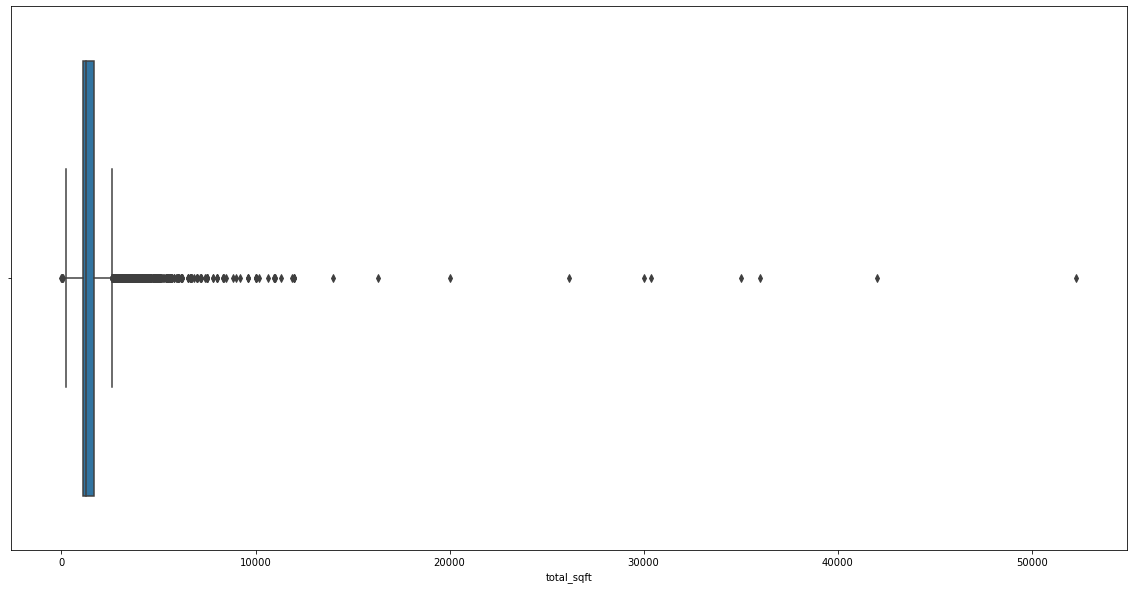

In [2203]:
sns.boxplot(x=df['total_sqft'])

In [2204]:
df.describe()

,total_sqft,price,BHK,price_per_sqf
count,12391.000000,12391.000000,12391.000000,1.239100e+04
mean,1576.374942,115.301133,2.825761,8.100148e+03
std,1273.883159,153.195099,1.320198,1.101524e+05
min,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,50.000000,2.000000,4.306913e+03
50%,1288.000000,73.800000,3.000000,5.500000e+03
75%,1700.000000,124.000000,3.000000,7.446809e+03
max,52272.000000,3600.000000,43.000000,1.200000e+07


In [2205]:
# trying find price per square feet, omitting values price less than 300 per square feet

In [2206]:
df= df[(df['total_sqft']/df['BHK'])>=300]
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqf
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [2207]:
df.shape

(11662, 6)

In [2208]:
df.describe()

,total_sqft,price,BHK,price_per_sqf
count,11662.000000,11662.000000,11662.000000,11662.000000
mean,1614.167202,114.378239,2.666867,6397.026074
std,1298.867563,156.562934,0.994918,4266.844353
min,300.000000,8.440000,1.000000,267.829813
25%,1120.000000,50.000000,2.000000,4255.319149
50%,1310.000000,70.472500,3.000000,5346.113870
75%,1724.000000,120.000000,3.000000,6998.742968
max,52272.000000,3600.000000,16.000000,176470.588235


In [2209]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqf)
        st = np.std(subdf.price_per_sqf)
        reduced_df = subdf[(subdf.price_per_sqf>(m-st)) & (subdf.price_per_sqf<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df= remove_outliers(df)
df.describe()

,total_sqft,price,BHK,price_per_sqf
count,9607.000000,9607.000000,9607.000000,9607.000000
mean,1526.992076,93.611151,2.589154,5733.416925
std,907.361253,88.846331,0.916535,2298.200216
min,300.000000,10.000000,1.000000,1250.000000
25%,1108.000000,50.000000,2.000000,4285.714286
50%,1300.000000,68.290000,2.000000,5219.780220
75%,1673.000000,103.000000,3.000000,6512.167584
max,30400.000000,2200.000000,16.000000,24509.803922


<AxesSubplot:xlabel='total_sqft'>

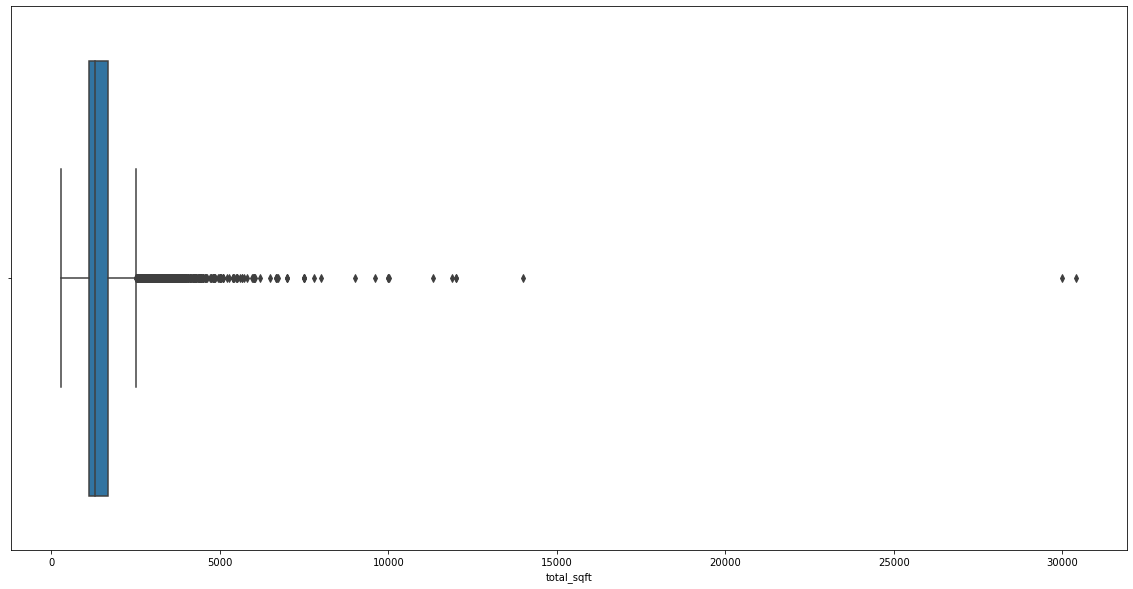

In [2210]:
sns.boxplot(x=df['total_sqft'])

In [2211]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqf),
                'std': np.std(BHK_df.price_per_sqf),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqf<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)


In [2212]:
df.describe()

,total_sqft,price,BHK,price_per_sqf
count,6835.000000,6835.000000,6835.000000,6835.000000
mean,1518.792963,102.252373,2.522165,6235.857094
std,893.982390,96.234467,0.948127,2444.219129
min,300.000000,10.000000,1.000000,1300.000000
25%,1098.000000,52.000000,2.000000,4704.436960
50%,1275.000000,75.000000,2.000000,5775.075988
75%,1700.000000,117.000000,3.000000,6991.698805
max,30000.000000,2200.000000,16.000000,24509.803922


<AxesSubplot:xlabel='total_sqft'>

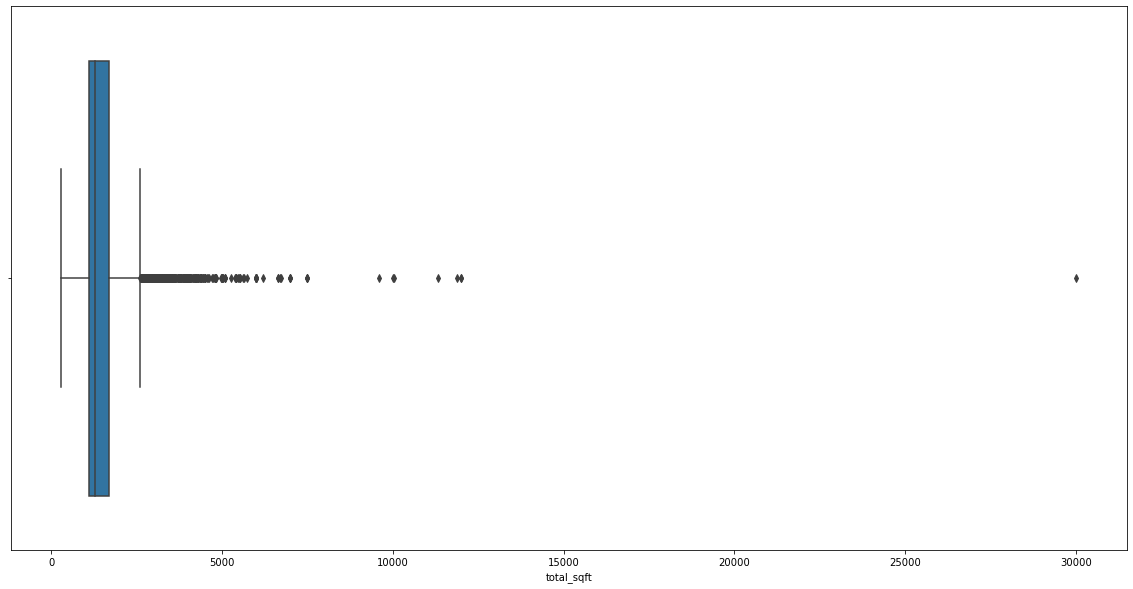

In [2213]:
sns.boxplot(x=df['total_sqft'])

In [2214]:
df= df.drop(columns =["price_per_sqf"])

In [2215]:
df.describe()

,total_sqft,price,BHK
count,6835.000000,6835.000000,6835.000000
mean,1518.792963,102.252373,2.522165
std,893.982390,96.234467,0.948127
min,300.000000,10.000000,1.000000
25%,1098.000000,52.000000,2.000000
50%,1275.000000,75.000000,2.000000
75%,1700.000000,117.000000,3.000000
max,30000.000000,2200.000000,16.000000


In [2216]:
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [2217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6835 entries, 0 to 9606
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6835 non-null   object 
 1   total_sqft  6835 non-null   float64
 2   bath        6835 non-null   object 
 3   price       6835 non-null   float64
 4   BHK         6835 non-null   int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 293.7+ KB


label encoding and feature scaling

So we have 1 categorical values and 3 numerical values, which needs to be treated sep

In [2218]:
df['bath'] = pd.to_numeric(df['bath'], errors='coerce').astype(float)
df = df.dropna(subset=['bath'])
df['BHK'] = pd.to_numeric(df['BHK'], errors='coerce').astype(float)


In [2219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800 entries, 0 to 9606
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6800 non-null   object 
 1   total_sqft  6800 non-null   float64
 2   bath        6800 non-null   float64
 3   price       6800 non-null   float64
 4   BHK         6800 non-null   float64
dtypes: float64(4), object(1)
memory usage: 318.8+ KB


In [2220]:
df["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  7.,  6.,  9., 12., 16., 13.])

In [2221]:
df = df.dropna(subset=['bath'])
df["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  7.,  6.,  9., 12., 16., 13.])

In [2222]:
categorical_column=["location"]
numerical_column=["total_sqft","bath","price","BHK"]

In [2223]:
categorical_column

['location']

In [2224]:
numerical_column

['total_sqft', 'bath', 'price', 'BHK']

In [2225]:
df['total_sqft'].unique()

array([2850., 1630., 1875., ..., 2505., 6688., 2872.])

In [2226]:
df= pd.get_dummies(df,columns= categorical_column, drop_first=True)

In [2227]:
df.head()

,total_sqft,bath,price,BHK,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2228]:
df.head()

,total_sqft,bath,price,BHK,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FEATURE SCALING

we are performing feature scaling on numerical columns, to put all features to same scale and we dont require to perfor feature scaling on encoded values

In [2229]:
df[numerical_column]=st.fit_transform(df[numerical_column])

In [2230]:
df.head()

,total_sqft,bath,price,BHK,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1.503790,1.46426,3.394885,1.564545,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.130716,0.50446,0.958666,0.507630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.406457,-0.45534,1.385525,0.507630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.353236,-0.45534,0.292350,0.507630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.313844,-0.45534,0.479751,-0.549285,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


SPLITTING INTO TRAIN AND TEST

In [2231]:
X = df.drop('price' , axis='columns')
Y = df['price']

In [2232]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [2233]:
Y_train

8502   -0.040808
3024   -0.592601
5457   -0.603012
9059   -0.373966
5909   -0.384377
          ...   
4632   -0.490572
6454    0.084126
6493   -0.748769
6796   -0.051219
1013   -0.144920
Name: price, Length: 5440, dtype: float64

In [2234]:
Y_test

5830   -0.670685
1161   -0.582190
1326   -0.470790
5177   -0.165742
3225    0.084126
          ...   
1985    0.333995
4319    0.084126
1296   -0.181359
8122    4.144491
141    -0.436433
Name: price, Length: 1360, dtype: float64

In [2235]:
#labelencoding categorical variables from x
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2236]:
X.shape, Y.shape

((6800, 233), (6800,))

In [2237]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1- LINEAR REGRESSION

In [2238]:
LINEAR_REG = LinearRegression()
LINEAR_REG .fit(X_train_scaled, Y_train)

LinearRegression()

In [2239]:
# Make predictions on the test set
linear_reg_pred = LINEAR_REG.predict(X_test_scaled)

In [2240]:
# Evaluate the model
mse = mean_squared_error(Y_test, linear_reg_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.13017056266652735


# Plot predicted vs. actual prices
plt.scatter(Y_test,linear_reg_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

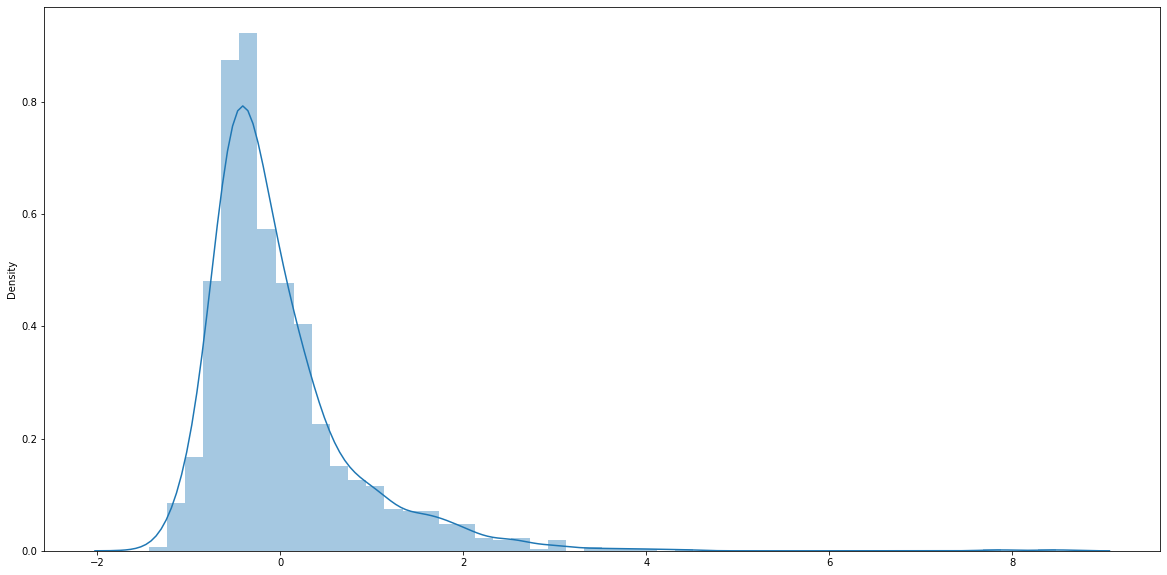

In [2241]:
sns.distplot((linear_reg_pred),bins=50);

# MODEL 2 RANDOM FOREST

In [2242]:
#RandomForestClassifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [2243]:
RF_pred = rf_model.predict(X_test)

In [2244]:
mse = mean_squared_error(Y_test, RF_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.12732288395072303


# Plot predicted vs. actual prices

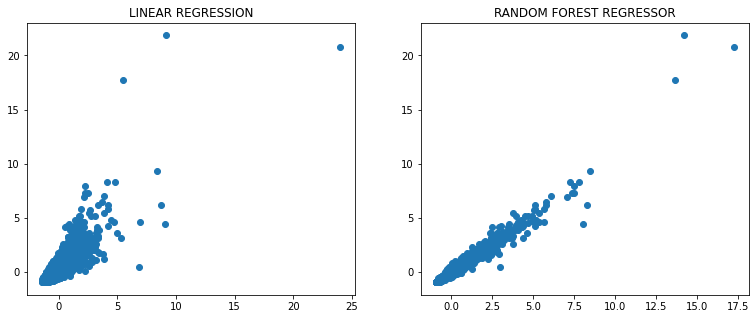

In [2245]:

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.scatter(LINEAR_REG.predict(X_train), Y_train)
plt.title('LINEAR REGRESSION')

plt.subplot(1,3,2)
plt.scatter(rf_model.predict(X_train), Y_train)
plt.title('RANDOM FOREST REGRESSOR')

plt.show()


Text(0.5, 1.0, 'RANDOM FOREST')

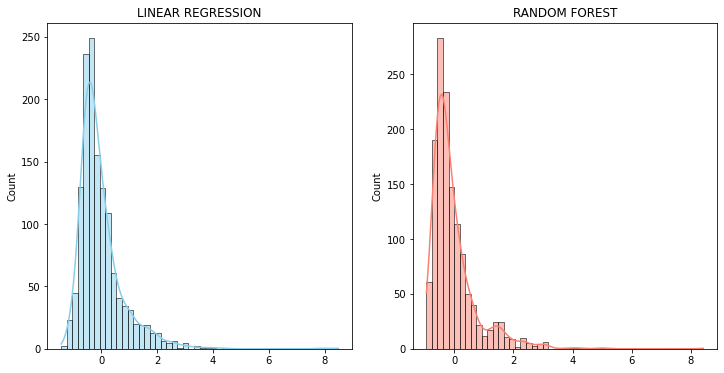

In [2246]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Distribution plot for linear_reg_pred1
sns.histplot(linear_reg_pred, bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('LINEAR REGRESSION')

# Distribution plot for linear_reg_pred2
sns.histplot(RF_pred, bins=50, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('RANDOM FOREST')



In [2247]:
# Creating function to calculate user defined input
def predict_price(location, total_sqft, bath, bhk):    
    loc_index = np.where(df.columns == 'location_' + location)[0][0]
    x = np.zeros(len(df.columns) - 1)
    x[3] = total_sqft
    x[1] = bath
    x[0] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return model2.predict([x])[0]

In [2248]:
predict_price('Indira Nagar',1000, 2, 2)

1.5687620448032826

In [2249]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

2.255900672328562

In [2250]:
predict_price('Indira Nagar',1000, 2, 2)

1.5687620448032826